In [1]:
## Load libraries
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

C:\Users\user\AppData\Local\Temp\ipykernel_15428\1680757352.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [11]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/MAHE/MSIS Coursework/OddSem2023MAHE'
    DATA_DIR = DIR + '/Data/'
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


**Problem-1**: we will reconstruct missing values in a real ECG signal. To that end, first load the ECG signal data and make a component plot of the loaded ECG vector by executing the cell below. Note the missing values:

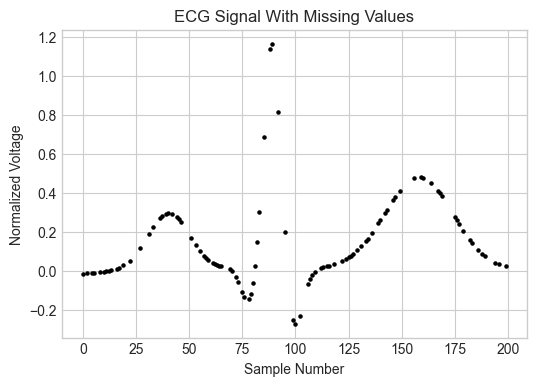

In [2]:
## Load data
FILE = 'ecg_missing.txt'
df_ecg = pd.read_csv(FILE, header = None, names = ['ecgvalues'])
df_ecg['ecgvalues'] = df_ecg['ecgvalues'].astype(float)

## Component plot of the ecg signal
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
component_index = range(0, len(df_ecg['ecgvalues']))
ax.scatter(component_index, df_ecg['ecgvalues'], color = 'black', marker = 'o', s = 5)
ax.set_xlabel('Sample Number')
ax.set_ylabel('Normalized Voltage')
ax.set_title('ECG Signal With Missing Values')

In [3]:
df_ecg['ecgvalues']

0     -0.014374
1           NaN
2     -0.012637
3           NaN
4     -0.010812
         ...   
195         NaN
196    0.033077
197         NaN
198         NaN
199    0.023651
Name: ecgvalues, Length: 200, dtype: float64

**Problem-1.1**: extract the indices corresponding to the missing ECG values

In [4]:
indices_unknown = df_ecg[df_ecg['ecgvalues'].isna()].index
indices_unknown

Int64Index([  1,   3,   6,   7,   9,  14,  15,  18,  20,  21,  23,  24,  25,
             26,  28,  29,  30,  32,  34,  35,  38,  41,  43,  47,  48,  49,
             50,  52,  54,  56,  60,  66,  67,  68,  71,  74,  77,  84,  86,
             87,  90,  91,  93,  94,  96,  97,  98, 101, 103, 104, 105, 110,
            111, 114, 117, 119, 120, 121, 123, 128, 130, 132, 135, 137, 138,
            141, 144, 145, 148, 150, 151, 152, 153, 154, 155, 157, 158, 161,
            162, 163, 165, 166, 170, 171, 172, 173, 174, 178, 180, 181, 184,
            185, 187, 190, 191, 192, 193, 195, 197, 198],
           dtype='int64')

**Problem-1.2**: extract the indices corresponding to the known ECG values

In [45]:
np.where(~df_ecg['ecgvalues'].isna())[0]

array([  0,   2,   4,   5,   8,  10,  11,  12,  13,  16,  17,  19,  22,
        27,  31,  33,  36,  37,  39,  40,  42,  44,  45,  46,  51,  53,
        55,  57,  58,  59,  61,  62,  63,  64,  65,  69,  70,  72,  73,
        75,  76,  78,  79,  80,  81,  82,  83,  85,  88,  89,  92,  95,
        99, 100, 102, 106, 107, 108, 109, 112, 113, 115, 116, 118, 122,
       124, 125, 126, 127, 129, 131, 133, 134, 136, 139, 140, 142, 143,
       146, 147, 149, 156, 159, 160, 164, 167, 168, 169, 175, 176, 177,
       179, 182, 183, 186, 188, 189, 194, 196, 199], dtype=int64)

In [5]:
indices_known = df_ecg[df_ecg['ecgvalues'].notna()].index
indices_known

Int64Index([  0,   2,   4,   5,   8,  10,  11,  12,  13,  16,  17,  19,  22,
             27,  31,  33,  36,  37,  39,  40,  42,  44,  45,  46,  51,  53,
             55,  57,  58,  59,  61,  62,  63,  64,  65,  69,  70,  72,  73,
             75,  76,  78,  79,  80,  81,  82,  83,  85,  88,  89,  92,  95,
             99, 100, 102, 106, 107, 108, 109, 112, 113, 115, 116, 118, 122,
            124, 125, 126, 127, 129, 131, 133, 134, 136, 139, 140, 142, 143,
            146, 147, 149, 156, 159, 160, 164, 167, 168, 169, 175, 176, 177,
            179, 182, 183, 186, 188, 189, 194, 196, 199],
           dtype='int64')

**Problem-1.3**: build a vector of known ecg signal values

In [67]:
x_known = df_ecg.loc[indices_known, 'ecgvalues']
x_known
x_unknown = df_ecg.loc[indices_unknown, 'ecgvalues']
x_unknown

1     NaN
3     NaN
6     NaN
7     NaN
9     NaN
       ..
192   NaN
193   NaN
195   NaN
197   NaN
198   NaN
Name: ecgvalues, Length: 100, dtype: float64

**Probem-1.4**: construct the matrices $S_1$ and $S_2.$

In [76]:
I = np.eye(len(df_ecg))
S1 = I[:, indices_known]
S2 = I[:, indices_unknown]

(200, 100)

**Problem-1.5**: build the matrix $D$

In [75]:
n = len(df_ecg) # size of the signal
a = 1*np.ones(n-1)
b = -2*np.ones(n)
D = np.diag(a, -1) + np.diag(b, 0) + np.diag(a, 1)
D = D[1:-1,:]
D

(198, 200)

Reconstruct the missing values such that the resulting ECG signal is smooth (we will do this part during the lab session).

In [70]:
dot1 = np.dot(S1, x_known)
b = np.dot(D, dot1)
A = np.dot(D,S2)
v = np.linalg.lstsq(A, -b)
df_ecg.loc[indices_unknown, 'ecgvalues'] = v[0]

C:\Users\user\AppData\Local\Temp\ipykernel_15428\696864232.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  v = np.linalg.lstsq(A, -b)


Text(0.5, 1.0, 'ECG Signal With Missing Values')

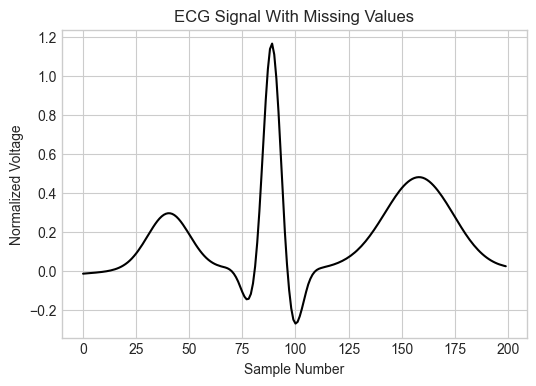

In [79]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
component_index = range(0, len(df_ecg['ecgvalues']))
ax.plot(component_index, df_ecg['ecgvalues'], color = 'black')
ax.set_xlabel('Sample Number')
ax.set_ylabel('Normalized Voltage')
ax.set_title('ECG Signal With Missing Values')

**Problem-2**: consider an $n$-vector $x$ of time series values. The following code snippet simulates such as vector. Try three different cycle frequency values (0.5, 1.0, 2.0) in the variable f below and observe what happens to the component plot of the vector.

Text(0.5, 1.0, 'Time series data')

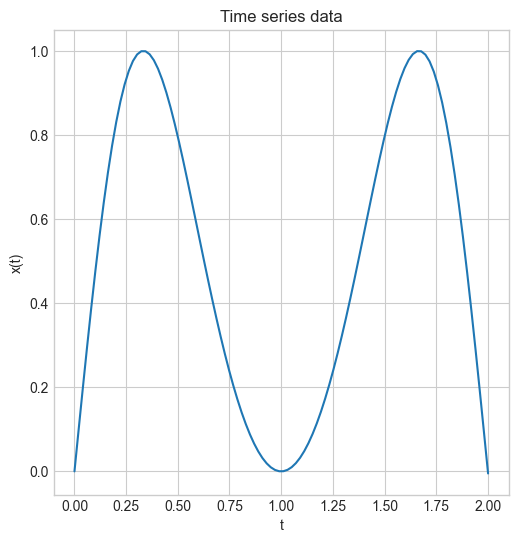

In [36]:
t_start = 0 # start time in sec
t_end = 2 # end time in sec
t = np.linspace(t_start, t_end+1e-03, 100) # timestamps
f =  0.5 # cycle frequency
omega = 2 * np.pi * f # angular frequency
x = np.sin(omega*np.sin(0.5*omega*t))
fig, ax2 = plt.subplots(1, 1, figsize = (6, 6))
fig.tight_layout(pad = 4.0)
ax2.plot(t, x)
ax2.set_xlabel('t')
ax2.set_ylabel('x(t)')
ax2.set_title('Time series data')

**Problem 2.1**: In order to measure how rough or wiggly a signal represented by a vector is, we measure the so called *Dirichlet energy* of the signal which for the vector $x$ we saw above is defined as:

$$(x_2-x_1)^2+(x_3-x_2)^2+\cdots+(x_{100}-x_{99})^2.$$

Calculate the Dirichlet energy of the vector $x$ for the three different frequency values mentioned above. How do the values compare to each other?

Use the following clue:

Dirichlet energy of $x = \lVert Dx\lVert_2^2,$ where $D$ is the matrix $$\begin{bmatrix}-1 & ? & ? &\cdots&?&?\\0 & ? & 1 &\cdots&?&?\\? & ? & ? &\cdots&?&?\\ &  & \vdots &\vdots&&\\? & ? & ? &\cdots&-1&?\end{bmatrix}.$$

In [89]:
a = -1*np.ones(99)
b = 1*np.ones(99)
D = np.diag(a, 1) + np.diag(b, -1)
D = D[1:-1, :]
x = np.array([np.sin(omega*np.sin(0.5*omega*t)), np.sin(omega*np.sin(1.0*omega*t)), np.sin(omega*np.sin(2.0*omega*t))])
products = np.dot(D,x.T)
print(D.shape)
print(x.shape)
products

(98, 100)
(3, 100)


array([[-0.19803383, -0.38748298, -0.70992426],
       [-0.19479003, -0.36234572, -0.53255105],
       [-0.18944916, -0.32244127, -0.28916563],
       [-0.18210757, -0.27053844, -0.0374396 ],
       [-0.17289657, -0.21010978,  0.17263592],
       [-0.16197892, -0.14499567,  0.31143989],
       [-0.14954471, -0.07905585,  0.3724439 ],
       [-0.13580643, -0.01585033,  0.36664785],
       [-0.12099373,  0.04161626,  0.3133903 ],
       [-0.10534788,  0.09106495,  0.23205583],
       [-0.08911604,  0.13101966,  0.13717435],
       [-0.07254577,  0.16079642,  0.03724274],
       [-0.05587963,  0.18042023, -0.06367108],
       [-0.03935031,  0.19049115, -0.16280411],
       [-0.02317623,  0.19202368, -0.25518838],
       [-0.00755774,  0.18628124, -0.3308085 ],
       [ 0.0073259 ,  0.17462417, -0.37360572],
       [ 0.02131888,  0.15838331, -0.36357443],
       [ 0.03429036,  0.13876613, -0.28266131],
       [ 0.04613531,  0.11679701, -0.1236326 ],
       [ 0.05677459,  0.0932897 ,  0.101